In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.2 MB/s eta 0:16:46tcmalloc: large alloc 1147494400 bytes == 0x55f68ad54000 @  0x7fb3314af615 0x55f650a2917c 0x55f650b0947a 0x55f650a2bf9d 0x55f650b1dd4d 0x55f650a9fec8 0x55f650a9aa2e 0x55f650a2d88a 0x55f650a9fd30 0x55f650a9aa2e 0x55f650a2d88a 0x55f650a9c719 0x55f650b1eb76 0x55f650a9bd95 0x55f650b1eb76 0x55f650a9bd95 0x55f650b1eb76 0x55f650a9bd95 0x55f650a2dce9 0x55f650a71579 0x55f650a2c902 0x55f650a9fc4d 0x55f650a9aa2e 0x55f650a2d88a 0x55f650a9c719 0x55f650a9aa2e 0x55f650a2d88a 0x55f650a9b8f6 0x55f650a2d7aa 0x55f650a9bb4f 0x55f650a9aa2e
     |████████████████▌               | 1055.7 MB 1.2 MB/s eta 0:14:07tcmalloc: large alloc 1434370048 bytes == 0x55f6cf3aa000 @  0x7fb3314af615 0x55f650a2917c 0x55f650b0947a 0x55f650a2bf9d 0x55f650b1dd4d 0x55f650a9fec8 0x55f650a9aa2e 0x55f650a2d88a 0x55f650a9fd30 0x55f650a9aa2e 0x55f650a2d88a 0x55f650a9c719 0x55f650b1eb76 0x55f650a9bd

In [3]:
!python tools/misc/download_dataset.py --dataset-name coco2017
# !python tools/misc/download_dataset.py --dataset-name voc2007
# !python tools/misc/download_dataset.py --dataset-name lvis

Streaming output truncated to the last 5000 lines.
 72% 4.45G/6.19G [02:18<00:49, 37.8MB/s]
 24% 4.41G/18.0G [02:18<06:41, 36.4MB/s]


 72% 4.46G/6.19G [02:18<00:49, 37.4MB/s]
 25% 4.41G/18.0G [02:18<06:35, 36.9MB/s]


 72% 4.46G/6.19G [02:18<00:50, 36.6MB/s]
 25% 4.42G/18.0G [02:18<06:42, 36.2MB/s]


 72% 4.46G/6.19G [02:18<00:50, 36.9MB/s]
 25% 4.42G/18.0G [02:18<06:30, 37.4MB/s]


 72% 4.47G/6.19G [02:18<00:48, 38.2MB/s]
 25% 4.43G/18.0G [02:19<06:41, 36.3MB/s]


 72% 4.47G/6.19G [02:18<00:49, 37.4MB/s]
 25% 4.43G/18.0G [02:19<06:43, 36.2MB/s]


 72% 4.47G/6.19G [02:18<00:49, 37.1MB/s]
 25% 4.43G/18.0G [02:19<06:35, 36.9MB/s]


 72% 4.48G/6.19G [02:18<00:49, 37.2MB/s]
 25% 4.44G/18.0G [02:19<06:35, 36.8MB/s]


 72% 4.48G/6.19G [02:19<00:48, 37.8MB/s]
 25% 4.44G/18.0G [02:19<06:38, 36.6MB/s]


 72% 4.48G/6.19G [02:19<00:48, 37.5MB/s]
 25% 4.44G/18.0G [02:19<06:40, 36.4MB/s]


 72% 4.49G/6.19G [02:19<00:47, 38.1MB/s]
 25% 4.45G/18.0G [02:19<06:43, 36.1MB/s]


 73% 4.49G/6.19G [02:19<0

In [4]:
%cd data/coco

/content/mmdetection/data/coco


In [5]:
! unzip test2017.zip
! unzip train2017.zip
! unzip val2017.zip
! unzip annotations_trainval2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000212226.jpg  
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/00000011

In [6]:
! unzip annotations_trainval2017.zip
# ! unzip lvis_v1_train.json.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [7]:
%cd ..
%cd ..

/content/mmdetection/data
/content/mmdetection


In [8]:
%cd content/mmdetection

[Errno 2] No such file or directory: 'content/mmdetection'
/content/mmdetection


In [9]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth \
      -O checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth

--2022-04-22 00:21:39--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167291982 (160M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth’

checkpoints/faster_ 100%[===================>] 159.54M  7.61MB/s    in 22s     

2022-04-22 00:22:02 (7.39 MB/s) - ‘checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth’ saved [167291982/167291982]



In [10]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config = 'configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth


FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [11]:
# Use the detector to do inference
img = 'data/coco/test2017/000000000001.jpg'
result = inference_detector(model, img)

/content/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


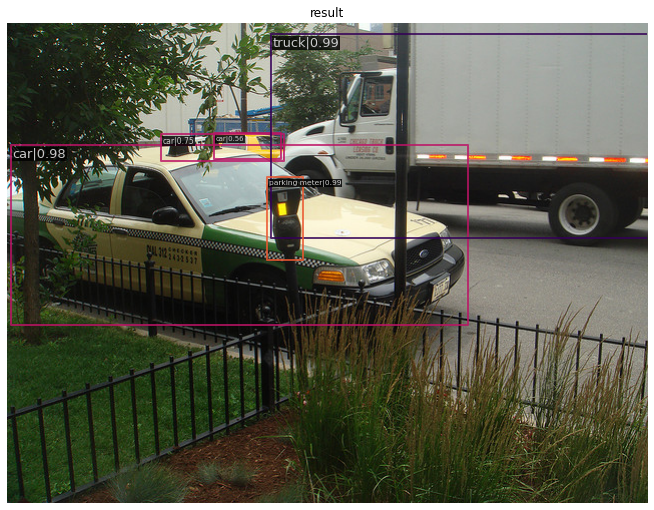

In [12]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

In [13]:
from mmcv import Config
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')
print(cfg)

Config (path: ./configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py): {'model': {'type': 'FasterRCNN', 'backbone': {'type': 'ResNet', 'depth': 50, 'num_stages': 4, 'out_indices': (0, 1, 2, 3), 'frozen_stages': 1, 'norm_cfg': {'type': 'BN', 'requires_grad': False}, 'norm_eval': True, 'style': 'caffe', 'init_cfg': {'type': 'Pretrained', 'checkpoint': 'open-mmlab://detectron2/resnet50_caffe'}}, 'neck': {'type': 'FPN', 'in_channels': [256, 512, 1024, 2048], 'out_channels': 256, 'num_outs': 5}, 'rpn_head': {'type': 'RPNHead', 'in_channels': 256, 'feat_channels': 256, 'anchor_generator': {'type': 'AnchorGenerator', 'scales': [8], 'ratios': [0.5, 1.0, 2.0], 'strides': [4, 8, 16, 32, 64]}, 'bbox_coder': {'type': 'DeltaXYWHBBoxCoder', 'target_means': [0.0, 0.0, 0.0, 0.0], 'target_stds': [1.0, 1.0, 1.0, 1.0]}, 'loss_cls': {'type': 'CrossEntropyLoss', 'use_sigmoid': True, 'loss_weight': 1.0}, 'loss_bbox': {'type': 'L1Loss', 'loss_weight': 1.0}}, 'roi_head': {'type': 'StandardRoIHead'

In [14]:
print(cfg.dataset_type)
print(cfg.data_root)
print(cfg.data.test.type)
#print(cfg.data.test.data_root)
print(cfg.data.test.ann_file)
print(cfg.data.test.img_prefix)
# cfg.data.test.ann_file = 'data/coco/annotations/instances_val2017.json'

CocoDataset
data/coco/
CocoDataset
data/coco/annotations/instances_val2017.json
data/coco/val2017/


In [17]:
print(cfg.data.train.type)
#print(cfg.data.train.data_root)
print(cfg.data.train.ann_file)
print(cfg.data.train.img_prefix)

CocoDataset
data/coco/annotations/instances_train2017.json
data/coco/train2017/


In [18]:
print(cfg.data.val.type)
#print(cfg.data.val.data_root)
print(cfg.data.val.ann_file)
print(cfg.data.val.img_prefix)

CocoDataset
data/coco/annotations/instances_val2017.json
data/coco/val2017/


In [19]:
# modify num classes of the model in box head
print(cfg.model.roi_head.bbox_head.num_classes)
# If we need to finetune a model based on a pre-trained detector, we need to
# use load_from to set the path of checkpoints.
print(cfg.load_from)

80
None


In [20]:
# Set up working dir to save files and logs.
#print(cfg.work_dir)

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
print(cfg.optimizer.lr)
print(cfg.lr_config.warmup)
print(cfg.log_config.interval)

# Change the evaluation metric since we use customized dataset.
print(cfg.evaluation.metric)
# We can set the evaluation interval to reduce the evaluation times
print(cfg.evaluation.interval)
# We can set the checkpoint saving interval to reduce the storage cost
print(cfg.checkpoint_config.interval)

# Set seed thus the results are more reproducible
#print(cfg.seed)
#set_random_seed(0, deterministic=False)
#print(cfg.gpu_ids)

print(cfg.log_config.hooks)

0.02
linear
50
bbox
1
1
[{'type': 'TextLoggerHook'}]


In [15]:
print(cfg.lr_config)

{'policy': 'step', 'warmup': 'linear', 'warmup_iters': 500, 'warmup_ratio': 0.001, 'step': [8, 11]}


In [21]:
cfg.lr_config = {'policy': 'step', 'warmup': 'linear', 'warmup_iters': 500, 'warmup_ratio': 0.001, 'step': [8, 11]}

In [45]:
from mmdet.apis import set_random_seed

# use load_from to set the path of checkpoints.
cfg.load_from = 'checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


In [26]:
%cd ..
%cd test2017

/content/mmdetection/data/coco
/content/mmdetection/data/coco/test2017


In [27]:
import os

# folder path
dir_path = r'.'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)


File count: 40670


In [28]:
import os

def sort(lst):  
  lst.sort(key = str)
  return lst

arr = os.listdir('.')
arr = sort(arr)
#print(sort(arr))
for i in range(len(arr)):
  if i >= 2500:
    os.remove(arr[i])


In [29]:
%cd .. 
%cd train2017

/content/mmdetection/data/coco
/content/mmdetection/data/coco/train2017


In [30]:
import os

# folder path
dir_path = r'.'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)


File count: 118287


In [31]:
import os

def sort(lst):  
  lst.sort(key = str)
  return lst

arr = os.listdir('.')
arr = sort(arr)
#print(sort(arr))
for i in range(len(arr)):
  if i >= 10000:
    os.remove(arr[i])


In [32]:
%cd ..
%cd val2017

/content/mmdetection/data/coco
/content/mmdetection/data/coco/val2017


In [35]:
import os

# folder path
dir_path = r'.'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)


File count: 2500


In [34]:
import os

def sort(lst):  
  lst.sort(key = str)
  return lst

arr = os.listdir('.')
arr = sort(arr)
#print(sort(arr))

for i in range(len(arr)):
  if i >= 2500:
    os.remove(arr[i])


In [38]:
%cd ..
%cd ..
%cd ..

/content/mmdetection


In [47]:
%pwd

'/content/mmdetection'

In [48]:
%cd data/coco/annotations/

/content/mmdetection/data/coco/annotations


In [64]:
%cd .. 

/content/mmdetection/data/coco


In [65]:
%cd val2017
import os

def sort(lst):  
  lst.sort(key = str)
  return lst

arr = os.listdir('.')
arr = sort(arr)
#print(sort(arr))

newfilelist = []
removallist = []
for i in range(len(arr)):
  if i >= 1500:
    os.remove(arr[i])
    removallist.append(arr[i])
  else:
    newfilelist.append(arr[i])


/content/mmdetection/data/coco/val2017


In [ ]:
%cd .. 
%cd annotations

In [81]:
import json
from pprint import pprint

f = open('instances_val2017.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
print(data.keys())
print(newfilelist)
print(removallist)
# pprint(data)
data_image = data['images']
data_image_new = []
for i in range(len(data_image)):
  # print(data_image[i]['file_name'])
  if data_image[i]['file_name'] != '000000397133.jpg':
    data_image_new.append(data_image[i])
data['images'] = data_image_new
pprint(data['images'][0])

with open("instances_val2017_trunc.json", "w") as outfile:
  json_object = json.dumps(data, indent = 4)
  outfile.write(json_object)

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
['000000000139.jpg', '000000000285.jpg', '000000000632.jpg', '000000000724.jpg', '000000000776.jpg', '000000000785.jpg', '000000000802.jpg', '000000000872.jpg', '000000000885.jpg', '000000001000.jpg', '000000001268.jpg', '000000001296.jpg', '000000001353.jpg', '000000001425.jpg', '000000001490.jpg', '000000001503.jpg', '000000001532.jpg', '000000001584.jpg', '000000001675.jpg', '000000001761.jpg', '000000001818.jpg', '000000001993.jpg', '000000002006.jpg', '000000002149.jpg', '000000002153.jpg', '000000002157.jpg', '000000002261.jpg', '000000002299.jpg', '000000002431.jpg', '000000002473.jpg', '000000002532.jpg', '000000002587.jpg', '000000002592.jpg', '000000002685.jpg', '000000002923.jpg', '000000003156.jpg', '000000003255.jpg', '000000003501.jpg', '000000003553.jpg', '000000003661.jpg', '000000003845.jpg', '000000003934.jpg', '000000004134.jpg', '000000004395.jpg', '000000004495.jpg', '000000004765.jpg', '0000000

In [83]:
import json
from pprint import pprint

f = open('instances_val2017_trunc.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
print(data.keys())
pprint(data['images'][0])

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
{'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg',
 'date_captured': '2013-11-14 20:55:31',
 'file_name': '000000037777.jpg',
 'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg',
 'height': 230,
 'id': 37777,
 'license': 1,
 'width': 352}


In [ ]:
import json
from pprint import pprint

f = open('instances_val2017.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
print(data.keys())
print(newfilelist)
print(removallist)

In [41]:
# # Set up working dir to save files and logs.
# cfg.work_dir = './tutorial_exps'

In [42]:
print(cfg.work_dir)

./tutorial_exps


In [46]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
import os.path as osp

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=15.62s)
creating index...
index created!
loading annotations into memory...


2022-04-22 00:50:03,705 - mmdet - INFO - load checkpoint from local path: checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth


Done (t=0.47s)
creating index...
index created!


2022-04-22 00:50:03,855 - mmdet - INFO - Start running, host: root@2f65cacf33c4, work_dir: /content/mmdetection/tutorial_exps
2022-04-22 00:50:03,857 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) TensorboardLoggerHook              
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) NumClassCheckHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) TensorboardLoggerHook              
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook   

FileNotFoundError: ignored